# Data Modeling

## Load the Data and Select the Features

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load and Check the Data

Import the dataset output from the previous preparation notebook

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

/var/folders/hn/11hmxl5x72jg2t7k7m1krds80000gn/T/ipykernel_18033/3343578540.py:1: DtypeWarning: Columns (124,125,126,129,130,131,134,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)


Check the number of columns and rows of the datasets in case of errors

In [4]:
loan_data_inputs_train.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:26.4-30.7,dti:30.7-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-15,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
2064503,NaN,NaN,15000,15000,15000.0,36 months,14.16,513.84,C,C2,...,0,0,0,0,0,0,0,1,0,0
1040257,NaN,NaN,11000,11000,11000.0,36 months,8.18,345.62,B,B1,...,0,0,0,1,0,0,0,0,0,0
870512,NaN,NaN,10000,10000,10000.0,36 months,11.39,329.24,B,B3,...,0,0,0,1,0,0,0,0,0,0
199952,NaN,NaN,10000,10000,10000.0,36 months,10.08,323.05,B,B1,...,0,0,0,0,0,0,0,1,0,0
1098582,NaN,NaN,7225,7225,7225.0,36 months,15.61,252.63,D,D1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
loan_data_inputs_train.shape

(1808534, 388)

In [6]:
loan_data_targets_train.head(5)

,nondefault_default
2064503,1
1040257,1
870512,1
199952,1
1098582,0


In [7]:
loan_data_targets_train.shape

(1808534, 1)

In [8]:
loan_data_inputs_test.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:26.4-30.7,dti:30.7-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-15,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
867991,NaN,NaN,5600,5600,5550.0,36 months,12.74,187.99,C,C1,...,0,0,0,1,0,0,0,0,0,0
1604283,NaN,NaN,36000,36000,36000.0,60 months,16.02,875.84,C,C5,...,0,0,0,1,0,0,0,0,0,0
541720,NaN,NaN,7200,7200,7200.0,36 months,15.59,251.68,C,C5,...,1,0,0,1,0,0,0,0,0,0
1937204,NaN,NaN,20000,20000,19900.0,36 months,12.49,668.98,B,B5,...,0,0,0,1,0,0,0,0,0,0
1783114,NaN,NaN,21000,21000,21000.0,36 months,12.12,698.71,B,B3,...,0,0,0,1,0,0,0,0,0,0


In [9]:
loan_data_inputs_test.shape

(452134, 388)

In [10]:
loan_data_targets_test.head(5)

,nondefault_default
867991,1
1604283,1
541720,1
1937204,0
1783114,1


In [11]:
loan_data_targets_test.shape

(452134, 1)

### Select the Features

Show all columns of the dataset **loan_data_inputs_train**

In [12]:
pd.options.display.max_columns = None
loan_data_inputs_train.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

Select variable needed for Probability Default model

In [13]:
selected_explanatory_variables = [
    # grade
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    # home_ownership
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    # addr_state
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'addr_state:NM_HI_SD',
    'addr_state:NY',
    'addr_state:FL',
    'addr_state:MO_MD_NC_TN_NJ_IN',
    'addr_state:CA',
    'addr_state:PA_MI_KY',
    'addr_state:VA_AK_MN_OH_AZ',
    'addr_state:TX',
    'addr_state:NE_DE',
    'addr_state:MA_WI_UT',
    'addr_state:GA_WY_RI_IL_MT',
    'addr_state:CT_WA_KS_ND_CO_SC',
    'addr_state:WV_NH_DC_OR_VT_ID_ME',
    # verification_status
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    # purpose
    'purpose:edu_smbus_rnenergy_mov',
    'purpose:debt_consolidation',
    'purpose:med_oth_wed_vac_hou_mjpur_hmimpr',
    'purpose:credit_card',
    'purpose:car',
    # initial_list_status
    'initial_list_status:f',
    'initial_list_status:w',
    # term
    'term:36',
    'term:60',
    # emp_length
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-6',
    'emp_length:7',
    'emp_length:8-9',
    'emp_length:10',
    # mths_since_issue_d
    'mths_since_issue_d:<2',
    'mths_since_issue_d:3-5',
    'mths_since_issue_d:6-7',
    'mths_since_issue_d:8-15',
    'mths_since_issue_d:16-45',
    'mths_since_issue_d:46-65',
    'mths_since_issue_d:>65',
    # int_rate
    'int_rate:<10.446',
    'int_rate:10.446-13.014',
    'int_rate:13.014-17.123',
    'int_rate:17.123-22.772',
    'int_rate:>22.772',
    # mths_since_earliest_cr_line
    'mths_since_earliest_cr_line:<142',
    'mths_since_earliest_cr_line:142-162',
    'mths_since_earliest_cr_line:163-244',
    'mths_since_earliest_cr_line:245-284',
    'mths_since_earliest_cr_line:285-345',
    # delinq_2yrs
    'delinq_2yrs:0',
    'delinq_2yrs:1-3',
    'delinq_2yrs:>3',
    # inq_last_6mths
    'inq_last_6mths:0',
    'inq_last_6mths:1-3',
    'inq_last_6mths:>3',
    # open_acc
    'open_acc:<4',
    'open_acc:4-9',
    'open_acc:10-22',
    'open_acc:23-34',
    'open_acc:>34',
    # pub_rec
    'pub_rec:<2',
    'pub_rec:2-5',
    'pub_rec:>5',
    # total_acc
    'total_acc:<22',
    'total_acc:22-56',
    'total_acc:>56',
    # acc_now_delinq
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    # total_rev_hi_lim
    'total_rev_hi_lim:<5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-50K',
    'total_rev_hi_lim:50K-100K',
    'total_rev_hi_lim:>=100K',
    # annual_inc
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>=140K',
    # dti
    'dti:<1.9',
    'dti:1.9-4.8',
    'dti:4.8-6.9',
    'dti:6.9-10.5',
    'dti:10.5-12.7',
    'dti:12.7-15.6',
    'dti:15.6-19.2',
    'dti:19.2-24.2',
    'dti:24.2-26.4',
    'dti:26.4-30.7',
    'dti:30.7-35',
    'dti:>35',
    # mths_since_last_delinq
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-18',
    'mths_since_last_delinq:19-67',
    'mths_since_last_delinq:>=68',
    # mths_since_last_record
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-15',
    'mths_since_last_record:16-25',
    'mths_since_last_record:26-38',
    'mths_since_last_record:39-87',
    'mths_since_last_record:88-108',
    'mths_since_last_record:>108']

Select the reference case for each category

In [14]:
reference_category = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'verification_status:Verified',
    'purpose:edu_smbus_rnenergy_mov',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>65',
    'int_rate:>22.772',
    'mths_since_earliest_cr_line:<142',
    'delinq_2yrs:>3',
    'inq_last_6mths:>3',
    'open_acc:<4',
    'pub_rec:<2',
    'total_acc:<22',
    'acc_now_delinq:0',
    'total_rev_hi_lim:<5K',
    'annual_inc:<20K',
    'dti:>35',
    'mths_since_last_delinq:0-18',
    'mths_since_last_record:0-15']

In [15]:
input_train_with_refer_categ = loan_data_inputs_train.loc[: , selected_explanatory_variables]
inputs_train = input_train_with_refer_categ.drop(reference_category, axis = 1)
inputs_train.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_HI_SD,addr_state:NY,addr_state:FL,addr_state:MO_MD_NC_TN_NJ_IN,addr_state:CA,addr_state:PA_MI_KY,addr_state:VA_AK_MN_OH_AZ,addr_state:TX,addr_state:NE_DE,addr_state:MA_WI_UT,addr_state:GA_WY_RI_IL_MT,addr_state:CT_WA_KS_ND_CO_SC,addr_state:WV_NH_DC_OR_VT_ID_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:med_oth_wed_vac_hou_mjpur_hmimpr,purpose:credit_card,purpose:car,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:<2,mths_since_issue_d:3-5,mths_since_issue_d:6-7,mths_since_issue_d:8-15,mths_since_issue_d:16-45,mths_since_issue_d:46-65,int_rate:<10.446,int_rate:10.446-13.014,int_rate:13.014-17.123,int_rate:17.123-22.772,mths_since_earliest_cr_line:142-162,mths_since_earliest_cr_line:163-244,mths_since_earliest_cr_line:245-284,mths_since_earliest_cr_line:285-345,delinq_2yrs:0,delinq_2yrs:1-3,inq_last_6mths:0,inq_last_6mths:1-3,open_acc:4-9,open_acc:10-22,open_acc:23-34,open_acc:>34,pub_rec:2-5,pub_rec:>5,total_acc:22-56,total_acc:>56,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-50K,total_rev_hi_lim:50K-100K,total_rev_hi_lim:>=100K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>=140K,dti:<1.9,dti:1.9-4.8,dti:4.8-6.9,dti:6.9-10.5,dti:10.5-12.7,dti:12.7-15.6,dti:15.6-19.2,dti:19.2-24.2,dti:24.2-26.4,dti:26.4-30.7,dti:30.7-35,mths_since_last_delinq:Missing,mths_since_last_delinq:19-67,mths_since_last_delinq:>=68,mths_since_last_record:Missing,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
2064503,False,False,True,False,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,True,False,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
1040257,False,True,False,False,False,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
870512,False,True,False,False,False,False,False,False,0,False,False,0,True,0,0,False,0,0,0,0,0,True,False,False,0,True,False,True,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
199952,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,False,0,0,1,0,0,False,True,False,1,False,False,True,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1098582,False,False,False,True,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,False,True,True,0,False,False,False,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2194248,False,False,False,True,False,False,False,True,1,False,False,0,False,0,0,False,0,0,0,0,0,True,False,True,0,False,False,True,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1013682,False,False,False,False,True,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,True,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1649058,False,False,False,False,False,True,True,False,0,False,False,0,False,0,0,False,0,0,0,

In [16]:
inputs_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1808534 entries, 2064503 to 1031523
Data columns (total 99 columns):
 #   Column                                    Non-Null Count    Dtype
---  ------                                    --------------    -----
 0   grade:A                                   1808534 non-null  bool 
 1   grade:B                                   1808534 non-null  bool 
 2   grade:C                                   1808534 non-null  bool 
 3   grade:D                                   1808534 non-null  bool 
 4   grade:E                                   1808534 non-null  bool 
 5   grade:F                                   1808534 non-null  bool 
 6   home_ownership:OWN                        1808534 non-null  bool 
 7   home_ownership:MORTGAGE                   1808534 non-null  bool 
 8   addr_state:NM_HI_SD                       1808534 non-null  int64
 9   addr_state:NY                             1808534 non-null  bool 
 10  addr_state:FL                

## Probability Default Model Estimation

### Import Libraries

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import scipy.stats as stat

### Logistic Regression

In [18]:
class LogisticRegression_p_values:
    def __init__(self, *args, **kwargs):
        self.model = LogisticRegression(*args, **kwargs)
    
    def fit(self, X, y):
        self.model.fit(X, y)
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_

        # calculate p_values for each coefficient
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)
        F_ij_float64 = F_ij.astype(np.float64)
        Cramer_Rao = np.linalg.inv(F_ij_float64)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.p_values = np.append(np.nan, np.round(p_values, 3))

In [19]:
log_reg_model1 = LogisticRegression_p_values()
log_reg_model1.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(log_reg_model1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_reg_model1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = log_reg_model1.p_values
summary_table['p:>0.05'] = np.where((summary_table['p_values'] > 0.05), "*", "")

In [21]:
pd.options.display.max_rows = None
summary_table

,Feature name,Coefficients,p_values,p:>0.05
0,Intercept,-0.197794,NaN,
1,grade:A,1.257021,0.000,
2,grade:B,0.692859,0.000,
3,grade:C,0.440156,0.000,
4,grade:D,0.224254,0.000,
5,grade:E,0.086989,0.001,
6,grade:F,-0.043098,0.083,*
7,home_ownership:OWN,0.110897,0.000,
8,home_ownership:MORTGAGE,0.252770,0.000,
9,addr_state:NM_HI_SD,0.130375,0.000,


Based on the **p_value** from the summary table, variable **delinq_2yrs** and **pub_rec** are removed.

In [22]:
selected_explanatory_variables = [
    # grade
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    # home_ownership
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    # addr_state
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'addr_state:NM_HI_SD',
    'addr_state:NY',
    'addr_state:FL',
    'addr_state:MO_MD_NC_TN_NJ_IN',
    'addr_state:CA',
    'addr_state:PA_MI_KY',
    'addr_state:VA_AK_MN_OH_AZ',
    'addr_state:TX',
    'addr_state:NE_DE',
    'addr_state:MA_WI_UT',
    'addr_state:GA_WY_RI_IL_MT',
    'addr_state:CT_WA_KS_ND_CO_SC',
    'addr_state:WV_NH_DC_OR_VT_ID_ME',
    # verification_status
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    # purpose
    'purpose:edu_smbus_rnenergy_mov',
    'purpose:debt_consolidation',
    'purpose:med_oth_wed_vac_hou_mjpur_hmimpr',
    'purpose:credit_card',
    'purpose:car',
    # initial_list_status
    'initial_list_status:f',
    'initial_list_status:w',
    # term
    'term:36',
    'term:60',
    # emp_length
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-6',
    'emp_length:7',
    'emp_length:8-9',
    'emp_length:10',
    # mths_since_issue_d
    'mths_since_issue_d:<2',
    'mths_since_issue_d:3-5',
    'mths_since_issue_d:6-7',
    'mths_since_issue_d:8-15',
    'mths_since_issue_d:16-45',
    'mths_since_issue_d:46-65',
    'mths_since_issue_d:>65',
    # int_rate
    'int_rate:<10.446',
    'int_rate:10.446-13.014',
    'int_rate:13.014-17.123',
    'int_rate:17.123-22.772',
    'int_rate:>22.772',
    # mths_since_earliest_cr_line
    'mths_since_earliest_cr_line:<142',
    'mths_since_earliest_cr_line:142-162',
    'mths_since_earliest_cr_line:163-244',
    'mths_since_earliest_cr_line:245-284',
    'mths_since_earliest_cr_line:285-345',
    # inq_last_6mths
    'inq_last_6mths:0',
    'inq_last_6mths:1-3',
    'inq_last_6mths:>3',
    # open_acc
    'open_acc:<4',
    'open_acc:4-9',
    'open_acc:10-22',
    'open_acc:23-34',
    'open_acc:>34',
    # total_acc
    'total_acc:<22',
    'total_acc:22-56',
    'total_acc:>56',
    # acc_now_delinq
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    # total_rev_hi_lim
    'total_rev_hi_lim:<5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-50K',
    'total_rev_hi_lim:50K-100K',
    'total_rev_hi_lim:>=100K',
    # annual_inc
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>=140K',
    # dti
    'dti:<1.9',
    'dti:1.9-4.8',
    'dti:4.8-6.9',
    'dti:6.9-10.5',
    'dti:10.5-12.7',
    'dti:12.7-15.6',
    'dti:15.6-19.2',
    'dti:19.2-24.2',
    'dti:24.2-26.4',
    'dti:26.4-30.7',
    'dti:30.7-35',
    'dti:>35',
    # mths_since_last_delinq
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-18',
    'mths_since_last_delinq:19-67',
    'mths_since_last_delinq:>=68',
    # mths_since_last_record
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-15',
    'mths_since_last_record:16-25',
    'mths_since_last_record:26-38',
    'mths_since_last_record:39-87',
    'mths_since_last_record:88-108',
    'mths_since_last_record:>108']

In [23]:
reference_category = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'verification_status:Verified',
    'purpose:edu_smbus_rnenergy_mov',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>65',
    'int_rate:>22.772',
    'mths_since_earliest_cr_line:<142',
    'inq_last_6mths:>3',
    'open_acc:<4',
    'total_acc:<22',
    'acc_now_delinq:0',
    'total_rev_hi_lim:<5K',
    'annual_inc:<20K',
    'dti:>35',
    'mths_since_last_delinq:0-18',
    'mths_since_last_record:0-15']

In [24]:
input_train_with_refer_categ = loan_data_inputs_train.loc[: , selected_explanatory_variables]
inputs_train = input_train_with_refer_categ.drop(reference_category, axis = 1)
inputs_train.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_HI_SD,addr_state:NY,addr_state:FL,addr_state:MO_MD_NC_TN_NJ_IN,addr_state:CA,addr_state:PA_MI_KY,addr_state:VA_AK_MN_OH_AZ,addr_state:TX,addr_state:NE_DE,addr_state:MA_WI_UT,addr_state:GA_WY_RI_IL_MT,addr_state:CT_WA_KS_ND_CO_SC,addr_state:WV_NH_DC_OR_VT_ID_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:med_oth_wed_vac_hou_mjpur_hmimpr,purpose:credit_card,purpose:car,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:<2,mths_since_issue_d:3-5,mths_since_issue_d:6-7,mths_since_issue_d:8-15,mths_since_issue_d:16-45,mths_since_issue_d:46-65,int_rate:<10.446,int_rate:10.446-13.014,int_rate:13.014-17.123,int_rate:17.123-22.772,mths_since_earliest_cr_line:142-162,mths_since_earliest_cr_line:163-244,mths_since_earliest_cr_line:245-284,mths_since_earliest_cr_line:285-345,inq_last_6mths:0,inq_last_6mths:1-3,open_acc:4-9,open_acc:10-22,open_acc:23-34,open_acc:>34,total_acc:22-56,total_acc:>56,acc_now_delinq:>=1,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-50K,total_rev_hi_lim:50K-100K,total_rev_hi_lim:>=100K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>=140K,dti:<1.9,dti:1.9-4.8,dti:4.8-6.9,dti:6.9-10.5,dti:10.5-12.7,dti:12.7-15.6,dti:15.6-19.2,dti:19.2-24.2,dti:24.2-26.4,dti:26.4-30.7,dti:30.7-35,mths_since_last_delinq:Missing,mths_since_last_delinq:19-67,mths_since_last_delinq:>=68,mths_since_last_record:Missing,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
2064503,False,False,True,False,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,True,False,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
1040257,False,True,False,False,False,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
870512,False,True,False,False,False,False,False,False,0,False,False,0,True,0,0,False,0,0,0,0,0,True,False,False,0,True,False,True,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
199952,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,False,0,0,1,0,0,False,True,False,1,False,False,True,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1098582,False,False,False,True,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,False,True,True,0,False,False,False,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2194248,False,False,False,True,False,False,False,True,1,False,False,0,False,0,0,False,0,0,0,0,0,True,False,True,0,False,False,True,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1013682,False,False,False,False,True,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,True,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1649058,False,False,False,False,False,True,True,False,0,False,False,0,False,0,0,False,0,0,0,1,0,False,False,True,0,False,False,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0

In [25]:
log_reg_model2 = LogisticRegression_p_values()
log_reg_model2.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(log_reg_model2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_reg_model2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = log_reg_model2.p_values
summary_table['p:>0.05'] = np.where((summary_table['p_values'] > 0.05), "*", "")

In [27]:
summary_table

,Feature name,Coefficients,p_values,p:>0.05
0,Intercept,-0.275483,NaN,
1,grade:A,1.343596,0.000,
2,grade:B,0.766465,0.000,
3,grade:C,0.511347,0.000,
4,grade:D,0.288914,0.000,
5,grade:E,0.144051,0.000,
6,grade:F,0.005900,0.811,*
7,home_ownership:OWN,0.101430,0.000,
8,home_ownership:MORTGAGE,0.246991,0.000,
9,addr_state:NM_HI_SD,0.161334,0.000,


Based on the **p_value** from the summary table, variable **total_acc** and **acc_now_delinq** are removed.

In [28]:
selected_explanatory_variables = [
    # grade
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    # home_ownership
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    # addr_state
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'addr_state:NM_HI_SD',
    'addr_state:NY',
    'addr_state:FL',
    'addr_state:MO_MD_NC_TN_NJ_IN',
    'addr_state:CA',
    'addr_state:PA_MI_KY',
    'addr_state:VA_AK_MN_OH_AZ',
    'addr_state:TX',
    'addr_state:NE_DE',
    'addr_state:MA_WI_UT',
    'addr_state:GA_WY_RI_IL_MT',
    'addr_state:CT_WA_KS_ND_CO_SC',
    'addr_state:WV_NH_DC_OR_VT_ID_ME',
    # verification_status
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    # purpose
    'purpose:edu_smbus_rnenergy_mov',
    'purpose:debt_consolidation',
    'purpose:med_oth_wed_vac_hou_mjpur_hmimpr',
    'purpose:credit_card',
    'purpose:car',
    # initial_list_status
    'initial_list_status:f',
    'initial_list_status:w',
    # term
    'term:36',
    'term:60',
    # emp_length
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-6',
    'emp_length:7',
    'emp_length:8-9',
    'emp_length:10',
    # mths_since_issue_d
    'mths_since_issue_d:<2',
    'mths_since_issue_d:3-5',
    'mths_since_issue_d:6-7',
    'mths_since_issue_d:8-15',
    'mths_since_issue_d:16-45',
    'mths_since_issue_d:46-65',
    'mths_since_issue_d:>65',
    # int_rate
    'int_rate:<10.446',
    'int_rate:10.446-13.014',
    'int_rate:13.014-17.123',
    'int_rate:17.123-22.772',
    'int_rate:>22.772',
    # mths_since_earliest_cr_line
    'mths_since_earliest_cr_line:<142',
    'mths_since_earliest_cr_line:142-162',
    'mths_since_earliest_cr_line:163-244',
    'mths_since_earliest_cr_line:245-284',
    'mths_since_earliest_cr_line:285-345',
    # inq_last_6mths
    'inq_last_6mths:0',
    'inq_last_6mths:1-3',
    'inq_last_6mths:>3',
    # open_acc
    'open_acc:<4',
    'open_acc:4-9',
    'open_acc:10-22',
    'open_acc:23-34',
    'open_acc:>34',
    # total_rev_hi_lim
    'total_rev_hi_lim:<5K',
    'total_rev_hi_lim:5K-10K',
    'total_rev_hi_lim:10K-20K',
    'total_rev_hi_lim:20K-30K',
    'total_rev_hi_lim:30K-40K',
    'total_rev_hi_lim:40K-50K',
    'total_rev_hi_lim:50K-100K',
    'total_rev_hi_lim:>=100K',
    # annual_inc
    'annual_inc:<20K',
    'annual_inc:20K-30K',
    'annual_inc:30K-40K',
    'annual_inc:40K-50K',
    'annual_inc:50K-60K',
    'annual_inc:60K-70K',
    'annual_inc:70K-80K',
    'annual_inc:80K-90K',
    'annual_inc:90K-100K',
    'annual_inc:100K-120K',
    'annual_inc:120K-140K',
    'annual_inc:>=140K',
    # dti
    'dti:<1.9',
    'dti:1.9-4.8',
    'dti:4.8-6.9',
    'dti:6.9-10.5',
    'dti:10.5-12.7',
    'dti:12.7-15.6',
    'dti:15.6-19.2',
    'dti:19.2-24.2',
    'dti:24.2-26.4',
    'dti:26.4-30.7',
    'dti:30.7-35',
    'dti:>35',
    # mths_since_last_delinq
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-18',
    'mths_since_last_delinq:19-67',
    'mths_since_last_delinq:>=68',
    # mths_since_last_record
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-15',
    'mths_since_last_record:16-25',
    'mths_since_last_record:26-38',
    'mths_since_last_record:39-87',
    'mths_since_last_record:88-108',
    'mths_since_last_record:>108']

In [29]:
reference_category = [
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'addr_state:IA_AL_LA_OK_AR_MS_NV',
    'verification_status:Verified',
    'purpose:edu_smbus_rnenergy_mov',
    'initial_list_status:f',
    'term:60',
    'emp_length:0',
    'mths_since_issue_d:>65',
    'int_rate:>22.772',
    'mths_since_earliest_cr_line:<142',
    'inq_last_6mths:>3',
    'open_acc:<4',
    'total_rev_hi_lim:<5K',
    'annual_inc:<20K',
    'dti:>35',
    'mths_since_last_delinq:0-18',
    'mths_since_last_record:0-15']

In [30]:
input_train_with_refer_categ = loan_data_inputs_train.loc[: , selected_explanatory_variables]
inputs_train = input_train_with_refer_categ.drop(reference_category, axis = 1)
inputs_train.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_HI_SD,addr_state:NY,addr_state:FL,addr_state:MO_MD_NC_TN_NJ_IN,addr_state:CA,addr_state:PA_MI_KY,addr_state:VA_AK_MN_OH_AZ,addr_state:TX,addr_state:NE_DE,addr_state:MA_WI_UT,addr_state:GA_WY_RI_IL_MT,addr_state:CT_WA_KS_ND_CO_SC,addr_state:WV_NH_DC_OR_VT_ID_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:med_oth_wed_vac_hou_mjpur_hmimpr,purpose:credit_card,purpose:car,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:<2,mths_since_issue_d:3-5,mths_since_issue_d:6-7,mths_since_issue_d:8-15,mths_since_issue_d:16-45,mths_since_issue_d:46-65,int_rate:<10.446,int_rate:10.446-13.014,int_rate:13.014-17.123,int_rate:17.123-22.772,mths_since_earliest_cr_line:142-162,mths_since_earliest_cr_line:163-244,mths_since_earliest_cr_line:245-284,mths_since_earliest_cr_line:285-345,inq_last_6mths:0,inq_last_6mths:1-3,open_acc:4-9,open_acc:10-22,open_acc:23-34,open_acc:>34,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-50K,total_rev_hi_lim:50K-100K,total_rev_hi_lim:>=100K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>=140K,dti:<1.9,dti:1.9-4.8,dti:4.8-6.9,dti:6.9-10.5,dti:10.5-12.7,dti:12.7-15.6,dti:15.6-19.2,dti:19.2-24.2,dti:24.2-26.4,dti:26.4-30.7,dti:30.7-35,mths_since_last_delinq:Missing,mths_since_last_delinq:19-67,mths_since_last_delinq:>=68,mths_since_last_record:Missing,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
2064503,False,False,True,False,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,True,False,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
1040257,False,True,False,False,False,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,False,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
870512,False,True,False,False,False,False,False,False,0,False,False,0,True,0,0,False,0,0,0,0,0,True,False,False,0,True,False,True,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
199952,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,False,0,0,1,0,0,False,True,False,1,False,False,True,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1098582,False,False,False,True,False,False,False,False,0,False,False,0,False,0,1,False,0,0,0,0,0,False,True,True,0,False,False,False,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2194248,False,False,False,True,False,False,False,True,1,False,False,0,False,0,0,False,0,0,0,0,0,True,False,True,0,False,False,True,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1013682,False,False,False,False,True,False,False,True,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,True,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1649058,False,False,False,False,False,True,True,False,0,False,False,0,False,0,0,False,0,0,0,1,0,False,False,True,0,False,False,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1349571,False,False,True,False,F

In [31]:
log_reg_model3 = LogisticRegression_p_values()
log_reg_model3.fit(inputs_train, loan_data_targets_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(log_reg_model3.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', log_reg_model3.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['p_values'] = log_reg_model3.p_values
summary_table['p:>0.05'] = np.where((summary_table['p_values'] > 0.05), "*", "")

In [33]:
summary_table

,Feature name,Coefficients,p_values,p:>0.05
0,Intercept,-0.360759,NaN,
1,grade:A,1.449110,0.000,
2,grade:B,0.884462,0.000,
3,grade:C,0.615360,0.000,
4,grade:D,0.380080,0.000,
5,grade:E,0.223769,0.000,
6,grade:F,0.087459,0.000,
7,home_ownership:OWN,0.109760,0.000,
8,home_ownership:MORTGAGE,0.248913,0.000,
9,addr_state:NM_HI_SD,0.160582,0.000,


## Out-of-sample Validation on Test Dataset

### Response Variable Prediction and Confusion Matrix

In [80]:
input_test_with_refer_categ = loan_data_inputs_test.loc[: , selected_explanatory_variables]
inputs_test = input_test_with_refer_categ.drop(reference_category, axis = 1)
inputs_test.head(10)

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_HI_SD,addr_state:NY,addr_state:FL,addr_state:MO_MD_NC_TN_NJ_IN,addr_state:CA,addr_state:PA_MI_KY,addr_state:VA_AK_MN_OH_AZ,addr_state:TX,addr_state:NE_DE,addr_state:MA_WI_UT,addr_state:GA_WY_RI_IL_MT,addr_state:CT_WA_KS_ND_CO_SC,addr_state:WV_NH_DC_OR_VT_ID_ME,verification_status:Not Verified,verification_status:Source Verified,purpose:debt_consolidation,purpose:med_oth_wed_vac_hou_mjpur_hmimpr,purpose:credit_card,purpose:car,initial_list_status:w,term:36,emp_length:1,emp_length:2-6,emp_length:7,emp_length:8-9,emp_length:10,mths_since_issue_d:<2,mths_since_issue_d:3-5,mths_since_issue_d:6-7,mths_since_issue_d:8-15,mths_since_issue_d:16-45,mths_since_issue_d:46-65,int_rate:<10.446,int_rate:10.446-13.014,int_rate:13.014-17.123,int_rate:17.123-22.772,mths_since_earliest_cr_line:142-162,mths_since_earliest_cr_line:163-244,mths_since_earliest_cr_line:245-284,mths_since_earliest_cr_line:285-345,inq_last_6mths:0,inq_last_6mths:1-3,open_acc:4-9,open_acc:10-22,open_acc:23-34,open_acc:>34,total_rev_hi_lim:5K-10K,total_rev_hi_lim:10K-20K,total_rev_hi_lim:20K-30K,total_rev_hi_lim:30K-40K,total_rev_hi_lim:40K-50K,total_rev_hi_lim:50K-100K,total_rev_hi_lim:>=100K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>=140K,dti:<1.9,dti:1.9-4.8,dti:4.8-6.9,dti:6.9-10.5,dti:10.5-12.7,dti:12.7-15.6,dti:15.6-19.2,dti:19.2-24.2,dti:24.2-26.4,dti:26.4-30.7,dti:30.7-35,mths_since_last_delinq:Missing,mths_since_last_delinq:19-67,mths_since_last_delinq:>=68,mths_since_last_record:Missing,mths_since_last_record:16-25,mths_since_last_record:26-38,mths_since_last_record:39-87,mths_since_last_record:88-108,mths_since_last_record:>108
867991,False,False,True,False,False,False,False,True,0,True,False,0,False,0,0,False,0,0,0,0,0,False,True,False,1,False,False,False,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1604283,False,False,True,False,False,False,False,False,0,False,False,0,True,0,0,False,0,0,0,0,0,False,True,True,0,False,False,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0
541720,False,False,True,False,False,False,False,False,0,False,False,0,False,1,0,False,0,0,0,0,0,False,False,False,1,False,False,True,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1937204,False,True,False,False,False,False,False,True,1,False,False,0,False,0,0,False,0,0,0,0,0,False,False,False,0,True,False,False,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0
1783114,False,True,False,False,False,False,False,True,0,False,True,0,False,0,0,False,0,0,0,0,0,False,True,False,0,True,False,False,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0
1743673,False,False,True,False,False,False,False,True,0,False,False,0,False,0,0,False,1,0,0,0,0,False,False,False,0,True,False,True,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0
722352,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,True,0,0,0,0,0,False,True,False,0,True,False,True,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
648621,False,True,False,False,False,False,False,True,0,False,False,0,False,0,0,False,0,1,0,0,0,False,True,False,1,False,False,True,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
1844143,False,False,True,False,F

Calculate predicted response variable **y_hat_test**

In [81]:
y_hat_test = log_reg_model3.model.predict(inputs_test)

Calculate predicted response variable probability **y_hat_test_prob**; in this case, the threshold is set 0.5 so that the loan with predicted **y_hat_test_prob** that is larger than 0.5 would be considered as non-default, **y_hat_test** = 1.

In [82]:
y_hat_test_prob = log_reg_model3.model.predict_proba(inputs_test)
y_hat_test_prob = y_hat_test_prob[: ][: , 1]
y_hat_test_prob

array([0.88969731, 0.86496288, 0.74235838, ..., 0.88045263, 0.8308301 ,
       0.84834803])

Build a dataframe containing actual value, predicted value, and predicted value probability

In [83]:
loan_data_targets_test_temp = loan_data_targets_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
df_actual_predicted_prob = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test), pd.DataFrame(y_hat_test_prob)], axis = 1)
df_actual_predicted_prob.columns = ['loan_data_targets_test', 'y_hat_test', 'y_hat_test_prob']
df_actual_predicted_prob.shape

(452134, 3)

In [84]:
df_actual_predicted_prob.index = loan_data_inputs_test.index
df_actual_predicted_prob.head(10)

,loan_data_targets_test,y_hat_test,y_hat_test_prob
867991,1,1,0.889697
1604283,1,1,0.864963
541720,1,1,0.742358
1937204,0,1,0.863218
1783114,1,1,0.908527
1743673,1,1,0.854039
722352,1,1,0.851342
648621,1,1,0.906390
1844143,1,1,0.780061
2212497,1,1,0.987009


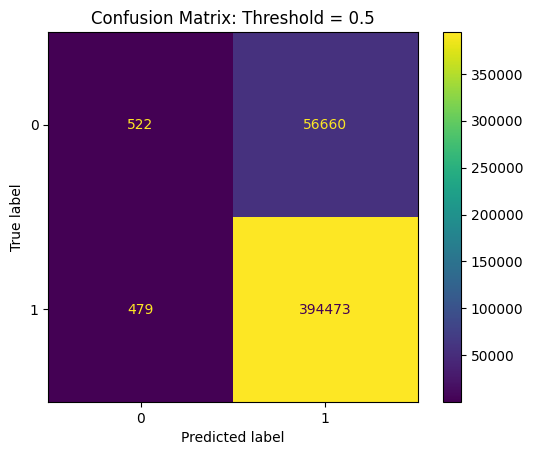

In [85]:
cm = confusion_matrix(loan_data_targets_test, y_hat_test, labels = log_reg_model3.model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = log_reg_model3.model.classes_)
disp.plot()
plt.title('Confusion Matrix: Threshold = 0.5')
plt.show()

Based on the confusion matrix, I realize that the number of false positive case is large and unacceptable for PD modeling.

### Accuracy and Area Under the Curve (AUC)

In [86]:
false_pos_rate, true_positive_rate, threshold = roc_curve(df_actual_predicted_prob['loan_data_targets_test'], 
                                                          df_actual_predicted_prob['y_hat_test_prob'])

Text(0.5, 1.0, 'ROC Curve')

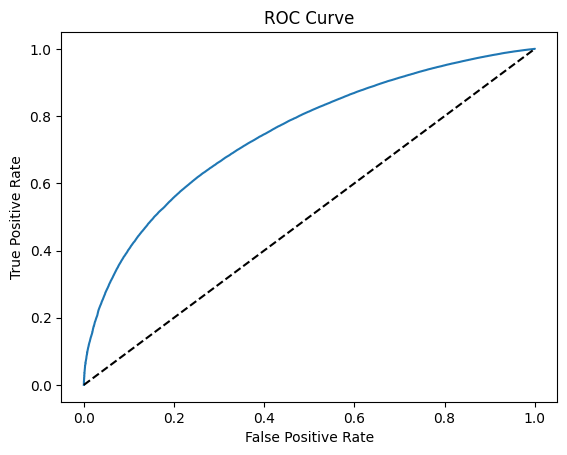

In [87]:
plt.plot(false_pos_rate, true_positive_rate)
plt.plot(false_pos_rate, false_pos_rate, linestyle = '--', color = 'k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [88]:
Area_Under_ROC = roc_auc_score(df_actual_predicted_prob['loan_data_targets_test'], df_actual_predicted_prob['y_hat_test_prob'])
print(Area_Under_ROC)

0.7477361992715529


Based on the score, the model performance is fair (70% - 80%).

### Gini Coefficient and Kolmogorov-Smirnov

Sort the dataframe **df_actual_predicted_prob** based on the variable **y_hat_test_prob** in ascending order

In [89]:
df_actual_predicted_prob = df_actual_predicted_prob.sort_values('y_hat_test_prob')
df_actual_predicted_prob.head(10)

,loan_data_targets_test,y_hat_test,y_hat_test_prob
669083,1,0,0.364786
1162536,0,0,0.365731
1134273,0,0,0.376151
1033738,1,0,0.379288
2005348,0,0,0.380559
1175876,0,0,0.380660
1290044,1,0,0.383720
1275431,1,0,0.388297
973394,0,0,0.393540
1059324,1,0,0.393854


In [90]:
df_actual_predicted_prob.tail(10)

,loan_data_targets_test,y_hat_test,y_hat_test_prob
239413,1,1,0.995835
346238,1,1,0.995839
438668,1,1,0.995885
2220519,1,1,0.995948
249144,1,1,0.995985
101093,1,1,0.995999
23783,1,1,0.996016
229459,1,1,0.996029
308073,1,1,0.996250
384689,1,1,0.996294


Create new index while keeping the original index of the dataframe

In [91]:
df_actual_predicted_prob = df_actual_predicted_prob.reset_index(level = None)
df_actual_predicted_prob.head(10)

,index,loan_data_targets_test,y_hat_test,y_hat_test_prob
0,669083,1,0,0.364786
1,1162536,0,0,0.365731
2,1134273,0,0,0.376151
3,1033738,1,0,0.379288
4,2005348,0,0,0.380559
5,1175876,0,0,0.380660
6,1290044,1,0,0.383720
7,1275431,1,0,0.388297
8,973394,0,0,0.393540
9,1059324,1,0,0.393854


Insert columns including **Cumulative N Total**, **Cumulative N Nondefault**, and **Cumulative N Default**

In [93]:
df_actual_predicted_prob['Cumulative N Total'] = df_actual_predicted_prob.index + 1
df_actual_predicted_prob['Cumulative N Nondefault'] = df_actual_predicted_prob['loan_data_targets_test'].cumsum()
df_actual_predicted_prob['Cumulative N Default'] = df_actual_predicted_prob['Cumulative N Total'] - df_actual_predicted_prob['Cumulative N Nondefault']
df_actual_predicted_prob.head(10)

,index,loan_data_targets_test,y_hat_test,y_hat_test_prob,Cumulative N Total,Cumulative N Nondefault,Cumulative N Default
0,669083,1,0,0.364786,1,1,0
1,1162536,0,0,0.365731,2,1,1
2,1134273,0,0,0.376151,3,1,2
3,1033738,1,0,0.379288,4,2,2
4,2005348,0,0,0.380559,5,2,3
5,1175876,0,0,0.380660,6,2,4
6,1290044,1,0,0.383720,7,3,4
7,1275431,1,0,0.388297,8,4,4
8,973394,0,0,0.393540,9,4,5
9,1059324,1,0,0.393854,10,5,5


Insert columns including **Cumulative % Total**, **Cumulative % Nondefault**, and **Cumulative % Default**

In [94]:
total_population = df_actual_predicted_prob.shape[0]
total_nondefault = df_actual_predicted_prob['loan_data_targets_test'].sum()
total_default = total_population - total_nondefault

df_actual_predicted_prob['Cumulative % Total'] = df_actual_predicted_prob['Cumulative N Total'] / total_population
df_actual_predicted_prob['Cumulative % Nondefault'] = df_actual_predicted_prob['Cumulative N Nondefault'] / total_nondefault
df_actual_predicted_prob['Cumulative % Default'] = df_actual_predicted_prob['Cumulative N Default'] / total_default

del total_population, total_nondefault, total_default
df_actual_predicted_prob.head(10)

,index,loan_data_targets_test,y_hat_test,y_hat_test_prob,Cumulative N Total,Cumulative N Nondefault,Cumulative N Default,Cumulative % Total,Cumulative % Nondefault,Cumulative % Default
0,669083,1,0,0.364786,1,1,0,0.000002,0.000003,0.000000
1,1162536,0,0,0.365731,2,1,1,0.000004,0.000003,0.000017
2,1134273,0,0,0.376151,3,1,2,0.000007,0.000003,0.000035
3,1033738,1,0,0.379288,4,2,2,0.000009,0.000005,0.000035
4,2005348,0,0,0.380559,5,2,3,0.000011,0.000005,0.000052
5,1175876,0,0,0.380660,6,2,4,0.000013,0.000005,0.000070
6,1290044,1,0,0.383720,7,3,4,0.000015,0.000008,0.000070
7,1275431,1,0,0.388297,8,4,4,0.000018,0.000010,0.000070
8,973394,0,0,0.393540,9,4,5,0.000020,0.000010,0.000087
9,1059324,1,0,0.393854,10,5,5,0.000022,0.000013,0.000087


In [95]:
df_actual_predicted_prob.tail(10)

,index,loan_data_targets_test,y_hat_test,y_hat_test_prob,Cumulative N Total,Cumulative N Nondefault,Cumulative N Default,Cumulative % Total,Cumulative % Nondefault,Cumulative % Default
452124,239413,1,1,0.995835,452125,394943,57182,0.999980,0.999977,1.0
452125,346238,1,1,0.995839,452126,394944,57182,0.999982,0.999980,1.0
452126,438668,1,1,0.995885,452127,394945,57182,0.999985,0.999982,1.0
452127,2220519,1,1,0.995948,452128,394946,57182,0.999987,0.999985,1.0
452128,249144,1,1,0.995985,452129,394947,57182,0.999989,0.999987,1.0
452129,101093,1,1,0.995999,452130,394948,57182,0.999991,0.999990,1.0
452130,23783,1,1,0.996016,452131,394949,57182,0.999993,0.999992,1.0
452131,229459,1,1,0.996029,452132,394950,57182,0.999996,0.999995,1.0
452132,308073,1,1,0.996250,452133,394951,57182,0.999998,0.999997,1.0
452133,384689,1,1,0.996294,452134,394952,57182,1.000000,1.000000,1.0


Calculate and plot the Gini coefficient

Text(0.5, 1.0, 'Gini Coefficient')

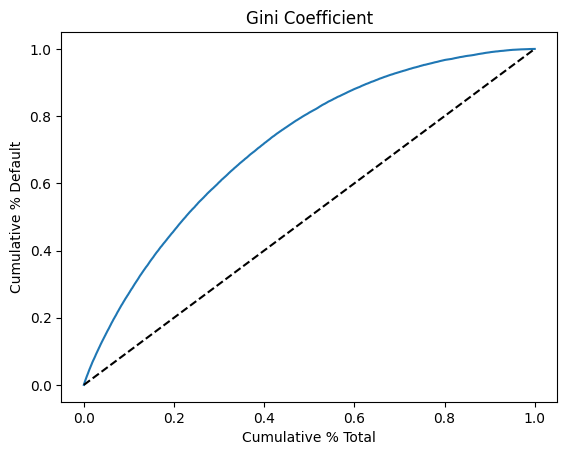

In [99]:
plt.plot(df_actual_predicted_prob['Cumulative % Total'], df_actual_predicted_prob['Cumulative % Default'])
plt.plot(df_actual_predicted_prob['Cumulative % Total'], df_actual_predicted_prob['Cumulative % Total'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Total')
plt.ylabel('Cumulative % Default')
plt.title('Gini Coefficient')

In [100]:
Gini_Coef = Area_Under_ROC * 2 - 1
print(Gini_Coef)

0.49547239854310576


Perform Kolmogorov-Smirnov test and calculate KS-statistic

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

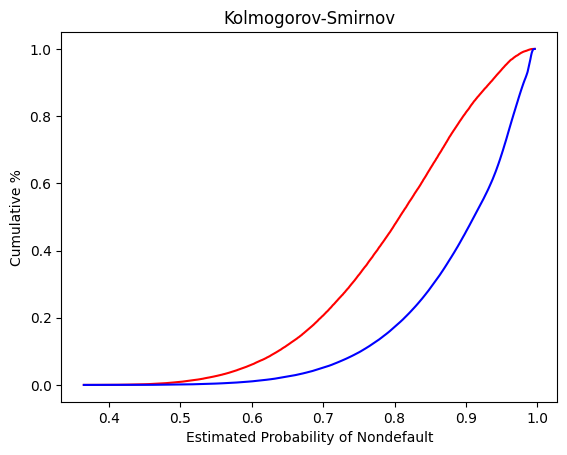

In [103]:
plt.plot(df_actual_predicted_prob['y_hat_test_prob'], df_actual_predicted_prob['Cumulative % Default'], color = 'r')
plt.plot(df_actual_predicted_prob['y_hat_test_prob'], df_actual_predicted_prob['Cumulative % Nondefault'], color = 'b')
plt.xlabel('Estimated Probability of Nondefault')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [104]:
Kolmogorov_Smirnov_statistic = max(df_actual_predicted_prob['Cumulative % Default'] - df_actual_predicted_prob['Cumulative % Nondefault'])
print(Kolmogorov_Smirnov_statistic)

0.3662936743143683


Based on the graph and KS-statistic, the 2 cumulative distribution functions are sufficiently far sway from each other and the model has satisfactory predictive power.